In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

In [4]:
# column names
region_names = ['aCNG','mCNG','pCNG', 'HIP','PHG', 'AMY', 'sTEMp', 'mTEMp']
# import the Ignition data
pd_table = pd.read_excel('/Users/yilewang/workspaces/data4project/prediction_project/prediction_data.xlsx', sheet_name='main_K21',skiprows=1)
# get the columns start with 'ignition'
pd_ignition = pd.DataFrame()
pd_ignition['group'] = pd_table['group']
pd_ignition['caseid'] = pd_table['caseid']
# concatenate the columns start with 'ignition'
for col in pd_table.columns:
    if col.startswith('ignition'):
        pd_ignition = pd.concat([pd_ignition, pd_table[col]], axis=1)
pd_ignition_avg = pd.DataFrame()
pd_ignition_avg['group'] = pd_ignition['group']
pd_ignition_avg['caseid'] = pd_ignition['caseid']
# for loop only for even number in pd_ignition columns
for index, i in enumerate(range(2, pd_ignition.shape[1], 2)):
    pd_ignition_avg[region_names[index]] = pd_ignition.iloc[:, i:i+2].mean(axis=1)


Index(['ignition_aCNG-R', 'ignition_aCNG-L'], dtype='object')
Index(['ignition_mCNG-R', 'ignition_mCNG-L'], dtype='object')
Index(['ignition_pCNG-R', 'ignition_pCNG-L'], dtype='object')
Index(['ignition_HIP-R', 'ignition_HIP-L'], dtype='object')
Index(['ignition_PHG-R', 'ignition_PHG-L'], dtype='object')
Index(['ignition_AMY-R', 'ignition_AMY-L'], dtype='object')
Index(['ignition_sTEMp-R', 'ignition_sTEMp-L'], dtype='object')
Index(['ignition_mTEMp-R', 'ignition_mTEMp-L'], dtype='object')


### First, Generate the Ignition graph

In [25]:
def plotting_function(data, y, ax, colors):
    sns.violinplot(x = 'group', y = y ,data=data, ax=ax, palette=colors, inner=None)
    # also the stripplot
    sns.stripplot(x = 'group', y = y,data=data, ax=ax, color='black', alpha=0.5, jitter=0.1)
    # the pointplot for the mean and median
    sns.pointplot(x = 'group', y = y ,data=data, ax=ax, ci=None, color = 'r', linestyles='')

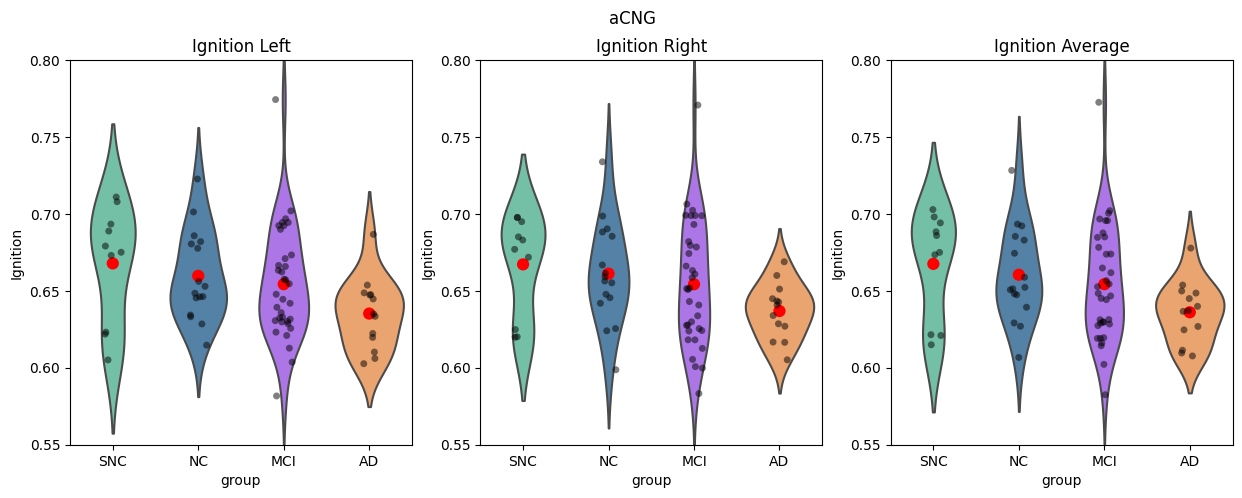

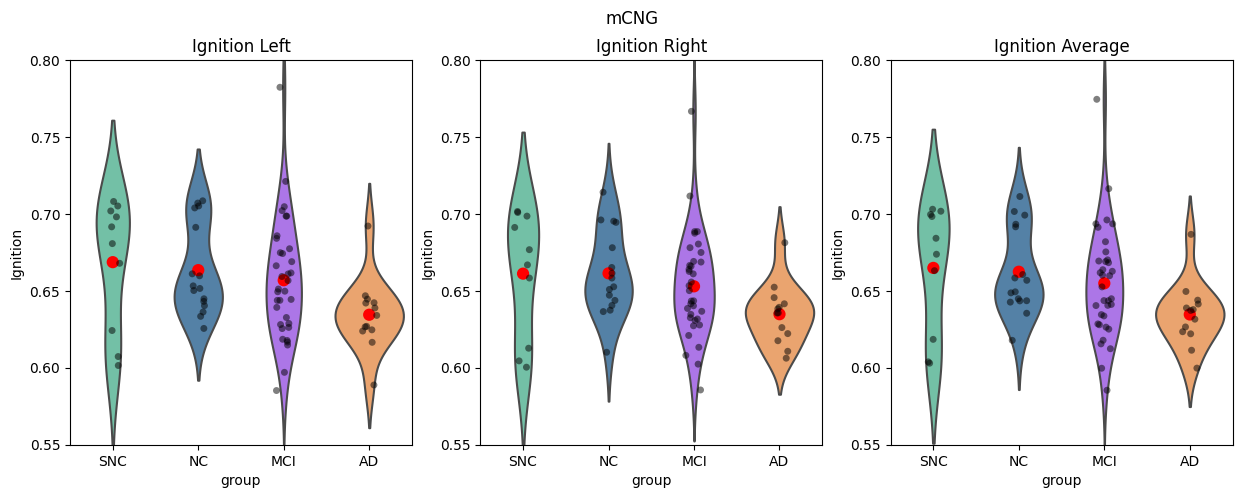

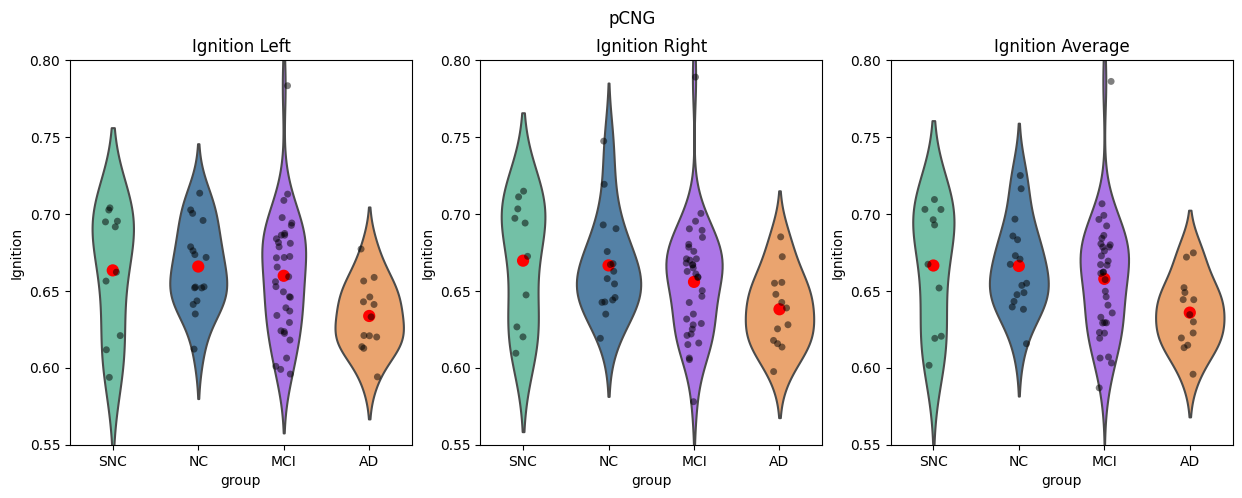

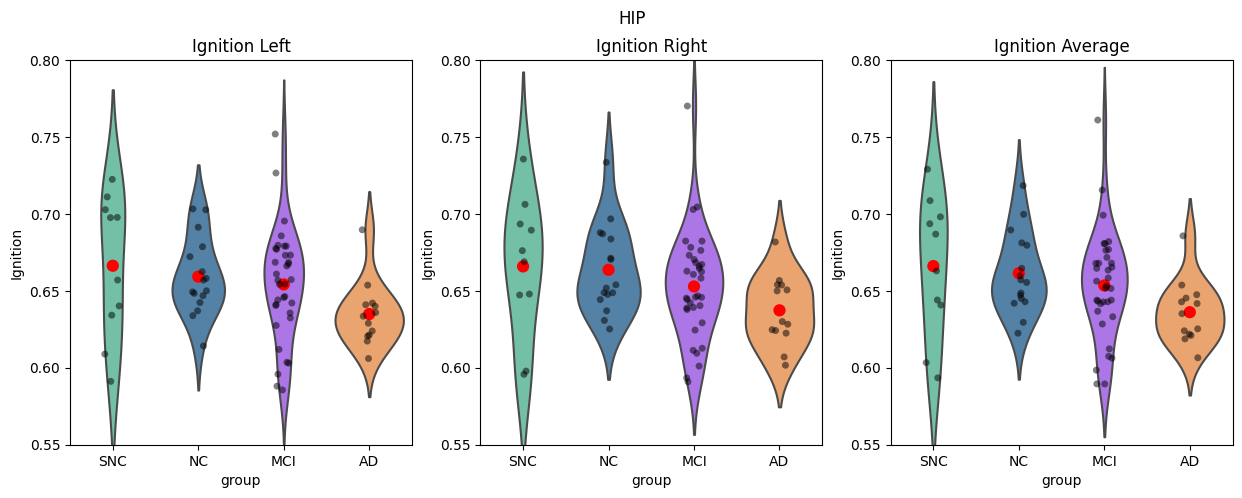

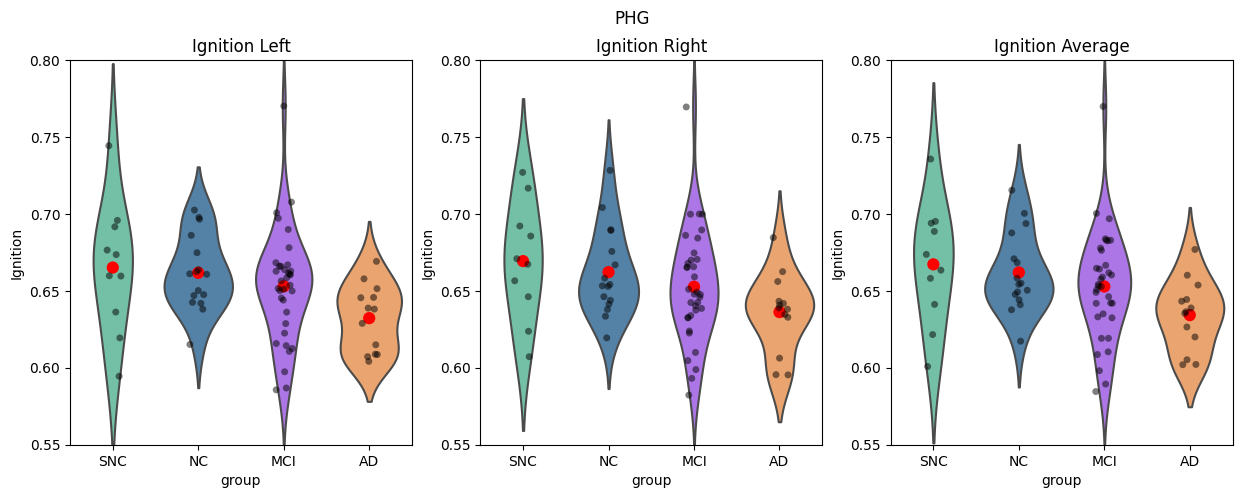

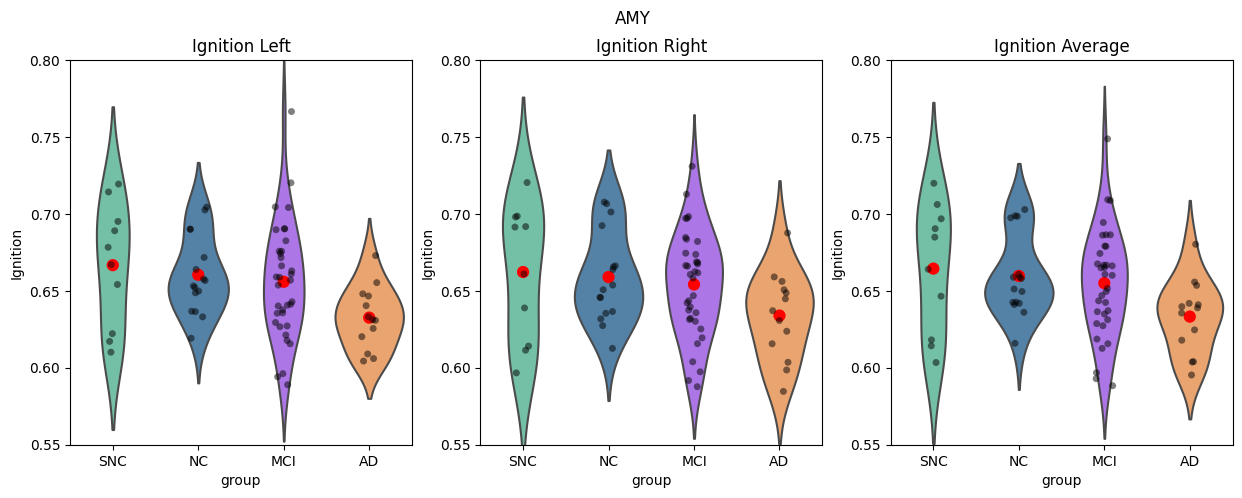

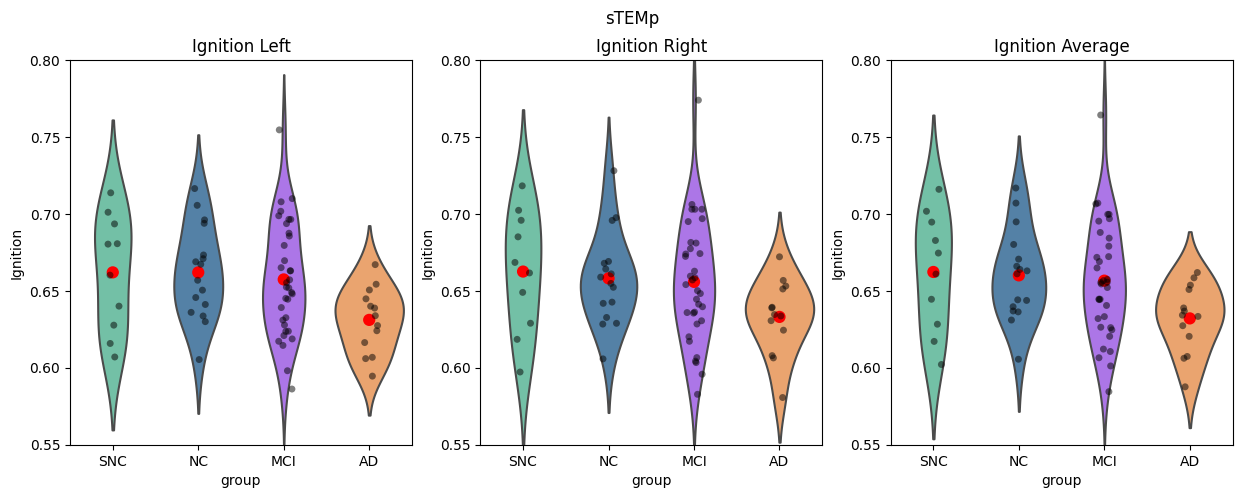

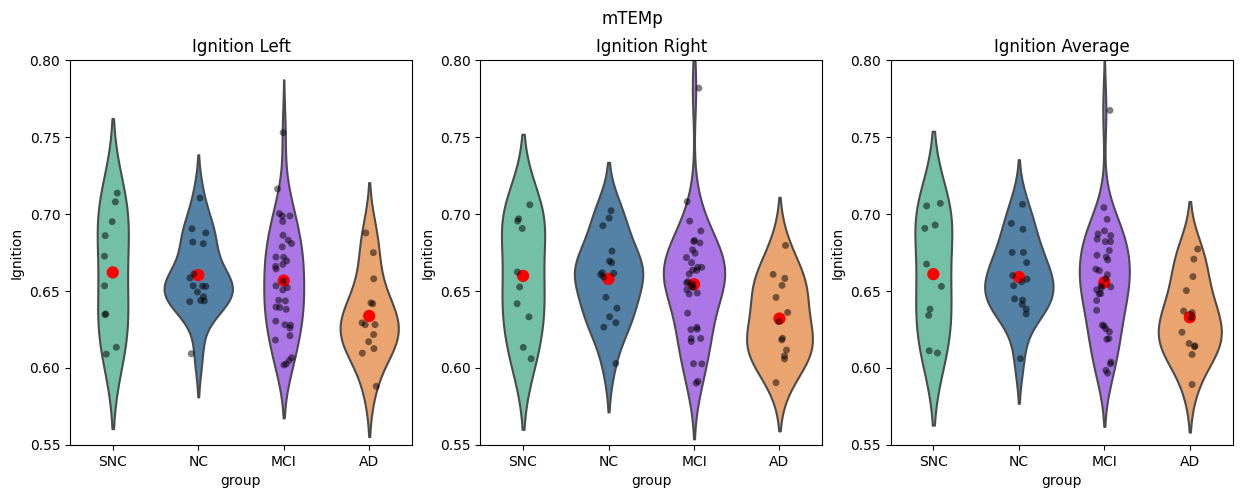

In [31]:
# generate three plots in a row: 1. violin plot of the ignition left; 2. violin plot of the ignition right; 3. violin plot of the ignition average

# set the color palette
colors = ["#66CDAA","#4682B4","#AB63FA","#FFA15A"]

for i in range(8):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(region_names[i])
    plotting_function(pd_ignition, pd_ignition.columns[2+2*i+1], axs[0], colors)
    axs[0].set_title('Ignition Left')
    axs[0].set_ylabel('Ignition')
    axs[0].set_ylim(0.55, 0.8)

    # plot the ignition right
    plotting_function(pd_ignition, pd_ignition.columns[2+2*i], axs[1], colors)
    axs[1].set_title('Ignition Right')
    axs[1].set_ylabel('Ignition')
    axs[1].set_ylim(0.55, 0.8)

    plotting_function(pd_ignition_avg, region_names[i], axs[2], colors)
    axs[2].set_title('Ignition Average')
    axs[2].set_ylabel('Ignition')
    axs[2].set_ylim(0.55, 0.8)
    # save the figures
    # plt.savefig('/Users/yilewang/workspaces/data4project/prediction_project/'+region_names[i]+'.png')

### 1.1 Global Ignition graph

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator


ggroup = ['SNC','NC','MCI','AD']
# read excel file
df = pd.read_excel('/Users/yilewang/workspaces/data4project/mega_table.xlsx', sheet_name='hodgepodge', skiprows=1)
# get all the columns starting with 'ignition'
ignition = df.filter(regex='ignition')
df_new = pd.concat([df['caseid'],df['group'], ignition], axis=1)
# discard rows with NaN values
df_new.dropna(inplace=True)
# average ignition based on groups, except caseid
df_group = df_new.drop('caseid', axis=1).groupby('group').mean()
# sort df_group based on ggroup
df_group = df_group.loc[ggroup]
group_ignition = pd.DataFrame(columns=['group', 'ignition'])
for i in range(4):
    df_group.iloc[i,:]
    groups = [ggroup[i]]*len(df_group.columns)
    temp = pd.DataFrame({'group':groups, 'ignition':df_group.iloc[i,:].values})
    group_ignition = pd.concat([group_ignition, temp], axis=0)

# plot
colors = ["#66CDAA","#4682B4","#AB63FA","#FFA15A"]
plt.figure(figsize=(5, 5))
sns.violinplot(x='group', y='ignition', data=group_ignition, inner=None, palette=colors, cut =0.5)
sns.stripplot(x='group', y='ignition', data=group_ignition, jitter=True, color='black', size=3)
sns.pointplot(x='group', y='ignition', data=group_ignition, color='r', ci=None, linestyles="")
annot = Annotator(pairs=[(("SNC"), ("NC")),(("SNC"), ("MCI")),(("SNC"), ("AD")), (("NC"), ("MCI")), (("MCI"),("AD"))],
            ax=plt.gca(),
            x='group',
            y='ignition',
            data=group_ignition)
annot.configure(test='Mann-Whitney', text_format='star', comparisons_correction= "BH", hide_non_significant=True, correction_format="replace")
annot.apply_and_annotate()

### Second: The quadratic check of the Ignition table

In [37]:
# def get_r_square(data, degree=2):
#     # fit a 2nd degree polynomial to the data
#     z = np.polyfit(range(4), data, degree)
#     p = np.poly1d(z)
#     # calculate the residuals
#     y = data
#     yhat = p(range(4)) # or [p(z) for z in x]
#     ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
#     ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
#     sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
#     # get signifiance
#     f_stat = ssreg / (degree * sstot)
#     df1 = degree
#     df2 = len(y) - degree - 1
#     p_value = stats.f.sf(f_stat, df1, df2)
#     return ssreg / sstot, p_value

def get_r_square(data, name):
# Example data points
    X = np.arange(4)
    Y = data
    # Linear model
    X_linear = sm.add_constant(X)
    linear_model = sm.OLS(Y, X_linear).fit()
    linear_r_squared = linear_model.rsquared
    linear_f_statistic = linear_model.fvalue
    linear_f_pvalue = linear_model.f_pvalue

    # Quadratic model
    X_quad = np.column_stack((X, X**2))
    X_quad = sm.add_constant(X_quad)
    quadratic_model = sm.OLS(Y, X_quad).fit()
    quadratic_r_squared = quadratic_model.rsquared
    quadratic_f_statistic = quadratic_model.fvalue
    quadratic_f_pvalue = quadratic_model.f_pvalue
    # Plotting the data and the fits
    # plt.title(name)
    # plt.scatter(X, Y, label='Data Points')

    # # Linear fit
    # plt.plot(X, linear_model.predict(X_linear), label='Linear Fit', color='red')

    # # Quadratic fit
    # plt.plot(X, quadratic_model.predict(X_quad), label='Quadratic Fit', color='blue')

    # plt.xlabel('X')
    # plt.ylabel('Y')
    # plt.legend()
    # plt.show()
    return linear_r_squared, linear_f_pvalue, quadratic_r_squared, quadratic_f_pvalue

In [52]:
ggroup = ['SNC','NC','MCI','AD']
group_ignition_mean = pd_ignition.groupby('group').mean()
group_ignition_mean = group_ignition_mean.loc[ggroup]

pd_ignition_trends = pd.DataFrame()
for i in group_ignition_mean.columns:
    max_ignition = group_ignition_mean[i].idxmax()
    # sec_max_ignition = group_ignition_mean[i].drop(max_ignition).idxmax()
    data = group_ignition_mean[i]
    # fit a linear regression
    r2_linear,p_linear = get_r_square(data, degree=1)
    r2_quadratic, p_quadratic = get_r_square(data, degree=2)
    pd_ignition_trends = pd.concat([pd_ignition_trends, pd.DataFrame({'region': [i], 'linear': [r2_linear], 'quadratic': [r2_quadratic], 'highest_mean': [max_ignition], "sig_linear": p_linear, "sig_quadratic": p_quadratic})], axis=0)
    # print(f"{i}, linear: {r_value**2}, quadratic: {ssreg / sstot}, highest_mean: {max_ignition}, second_highest_mean: {sec_max_ignition}")
pd_ignition_trends.to_excel('/Users/yilewang/workspaces/data4project/prediction_project/ignition_trends.xlsx', index=False)


/var/folders/3n/xjq3mj2x4fg20l17q5mydc1c0000gn/T/ipykernel_49294/377159136.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_ignition_mean = pd_ignition.groupby('group').mean()


In [38]:
ggroup = ['SNC','NC','MCI','AD']
pd_origin = pd.read_excel('/Users/yilewang/workspaces/data4project/prediction_project/prediction_data_included.xlsx', sheet_name='all')

# pd_origin = pd.read_excel('/Users/yilewang/workspaces/data4project/table_solodkin_332021.xlsx', sheet_name='amplitude')

group_all_mean = pd_origin.groupby('group').mean(numeric_only=True)
group_all_mean = group_all_mean.loc[ggroup]

pd_all_trends = pd.DataFrame()
for i in group_all_mean.columns:
    max_group = group_all_mean[i].idxmax()
    min_group = group_all_mean[i].idxmin()
    # sec_max_ignition = group_all_mean[i].drop(max_ignition).idxmax()
    data = group_all_mean[i]
    # fit a linear regression
    r2_linear,p_linear, r2_quadratic, p_quadratic = get_r_square(data, i)
    pd_all_trends = pd.concat([pd_all_trends, pd.DataFrame({'region': [i], 'linear': [r2_linear], 'quadratic': [r2_quadratic], 
                                                            # 'highest_mean': [max_group], 'lowest_group': [min_group],
                                                            "sig_linear": p_linear, "sig_quadratic": p_quadratic})], axis=0)

    # print(f"{i}, linear: {r_value**2}, quadratic: {ssreg / sstot}, highest_mean: {max_ignition}, second_highest_mean: {sec_max_ignition}")
print(pd_all_trends)
#pd_all_trends.to_excel('/Users/yilewang/workspaces/data4project/prediction_project/all_trends.xlsx', index=False)

                  region    linear  quadratic  sig_linear  sig_quadratic
0        ignition_aCNG-R  0.928303   0.991022    0.036515       0.094753
0        ignition_aCNG-L  0.924327   0.976754    0.038581       0.152466
0        ignition_mCNG-R  0.820368   0.999885    0.094258       0.010708
0        ignition_mCNG-L  0.875570   0.984696    0.064281       0.123709
0        ignition_pCNG-R  0.911493   0.999979    0.045279       0.004592
0        ignition_pCNG-L  0.680220   0.989782    0.175246       0.101084
0         ignition_HIP-R  0.911159   0.998461    0.045454       0.039229
0         ignition_HIP-L  0.907445   0.975822    0.047401       0.155492
0         ignition_PHG-R  0.962779   0.998202    0.018787       0.042402
0         ignition_PHG-L  0.881874   0.996702    0.060919       0.057427
0         ignition_AMY-R  0.831584   0.980042    0.088088       0.141274
0         ignition_AMY-L  0.859219   0.968337    0.073059       0.177940
0       ignition_sTEMp-R  0.789212   0.951055    0.

### Try to test one case